In [1]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# '깃대종'이 언급된 카카오 블로그, 카페 글
df = pd.read_excel('D:/GEODATA/kakao_blog_cafe.xlsx', sheet_name='Sheet1').drop(['Unnamed: 0'], axis=1)
df[['title']].to_csv('D:/GEODATA/kakao_blog_cafe.txt', index=False, header=False)
f = open("D:/GEODATA/kakao_blog_cafe.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [4]:
# 단어 2차원 리스트
dataset = []
for i in range(len(lines)):
    dataset.append(kkma.nouns(lines[i]))
dataset = [[y for y in x if not len(y)==1] for x in dataset]   # 2자 이상 
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자판별
dataset[:10]

[['국립공원', '깃대', '깃대종뱃지', '21종', '모두', '획득'],
 ['호반새', '육추', '계룡', '계룡산', '깃대', '깃대종'],
 ['국립공원', '깃대', '깃대종', '식물'],
 ['깃대', '깃대종', '국립', '국립공원', '공원', '그린', '그린포인트', '포인트'],
 ['국립공원', '깃대', '깃대종뱃지', '18종'],
 ['한라산', '한라산국립공원', '국립공원', '대표', '생물', '깃대', '깃대종', '선정'],
 ['생태계', '보고', '깃대', '깃대종', '서식지'],
 ['내장산', '깃대', '깃대종', '진노랑', '진노랑상사화', '상사화'],
 ['깃대', '깃대종'],
 ['카카오', '검색', '이용', '깃대', '깃대종', '로그', '카페', '가시화']]

In [5]:
# Word2Vec 불러오기
from gensim.models.word2vec import Word2Vec

In [6]:
# 모형 구축
model = Word2Vec(dataset,
                 sg=1,           # Skip-gram 적용: 중심 단어로 주변 단어를 예측
                 window=5,       # 중심 단어로부터 좌우 5개 단어까지 학습에 적용
                 min_count=1     # 전체문서에서 최소 1회 이상 출현단어로 학습 진행
                )
model.init_sims(replace=True)

c:\users\bhyu\appdata\local\programs\python\python35\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
# 단어간 유사도
print("깃대종과 국립공원 단어간 유사도는 %.2f 입니다." % (model.wv.similarity('깃대종', '국립공원')))

깃대종과 국립공원 단어간 유사도는 0.99 입니다.


In [8]:
# 가장 유사한 단어 10개
model.wv.most_similar("깃대종", topn=10)

[('국립공원', 0.9901725649833679),
 ('산행', 0.9895421266555786),
 ('여행', 0.9888993501663208),
 ('대전', 0.988831102848053),
 ('정기', 0.9883984923362732),
 ('나무', 0.9879107475280762),
 ('깃대', 0.9878422617912292),
 ('안내', 0.987459123134613),
 ('둘레', 0.9871837496757507),
 ('공원', 0.986480176448822)]

In [9]:
# 가장 유사한 단어 10개: 오대산, 주왕산, 북한산, 무등산, 지리산
df1 = pd.DataFrame(model.wv.most_similar("오대산", topn=100), columns=['단어', '유사도'])
df2 = pd.DataFrame(model.wv.most_similar("주왕산", topn=100), columns=['단어', '유사도'])
df3 = pd.DataFrame(model.wv.most_similar("북한산", topn=100), columns=['단어', '유사도'])
df4 = pd.DataFrame(model.wv.most_similar("무등산", topn=100), columns=['단어', '유사도'])
df5 = pd.DataFrame(model.wv.most_similar("지리산", topn=100), columns=['단어', '유사도'])
df2 = df1.merge(df2, how='inner', on='단어')
df3 = df2.merge(df3, how='inner', on='단어')
df4 = df3.merge(df4, how='inner', on='단어')
df5 = df4.merge(df5, how='inner', on='단어')
df5.columns = ['단어', '지리산', '오대산', '북한산', '주왕산', '가야산']
df5.head(10)

,단어,지리산,오대산,북한산,주왕산,가야산
0,산행,0.994039,0.990028,0.990548,0.983770,0.992372
1,여행,0.993244,0.988987,0.990528,0.982585,0.991148
2,안내,0.992401,0.987263,0.990001,0.979603,0.991050
3,국립공원,0.992336,0.990038,0.990761,0.984538,0.992226
4,계곡,0.991840,0.989593,0.986711,0.981326,0.990171
5,생태,0.991521,0.990199,0.990055,0.984265,0.990027
6,정기,0.991370,0.987801,0.986248,0.982758,0.991737
7,공원,0.991191,0.990399,0.987401,0.981412,0.989764
8,둘레,0.990533,0.987164,0.989797,0.979150,0.990851
9,선재길,0.990493,0.978885,0.980834,0.969496,0.979299


In [10]:
# 단어 평균 컬럼 추가
df5['전체'] = df5.mean(numeric_only=True, axis=1)
df5.head(10)

,단어,지리산,오대산,북한산,주왕산,가야산,전체
0,산행,0.994039,0.990028,0.990548,0.983770,0.992372,0.990152
1,여행,0.993244,0.988987,0.990528,0.982585,0.991148,0.989298
2,안내,0.992401,0.987263,0.990001,0.979603,0.991050,0.988064
3,국립공원,0.992336,0.990038,0.990761,0.984538,0.992226,0.989980
4,계곡,0.991840,0.989593,0.986711,0.981326,0.990171,0.987928
5,생태,0.991521,0.990199,0.990055,0.984265,0.990027,0.989213
6,정기,0.991370,0.987801,0.986248,0.982758,0.991737,0.987983
7,공원,0.991191,0.990399,0.987401,0.981412,0.989764,0.988033
8,둘레,0.990533,0.987164,0.989797,0.979150,0.990851,0.987499
9,선재길,0.990493,0.978885,0.980834,0.969496,0.979299,0.979801


In [13]:
# 단어 평균 컬럼 기준으로 필터링
df = df5.loc[df5['전체'] >= 0.98]
print("5개 단어간 유사도가 평균 0.98 이상인 단어는 %.2d개입니다." % (len(df)))

5개 단어간 유사도가 평균 0.98 이상인 단어는 39개입니다.


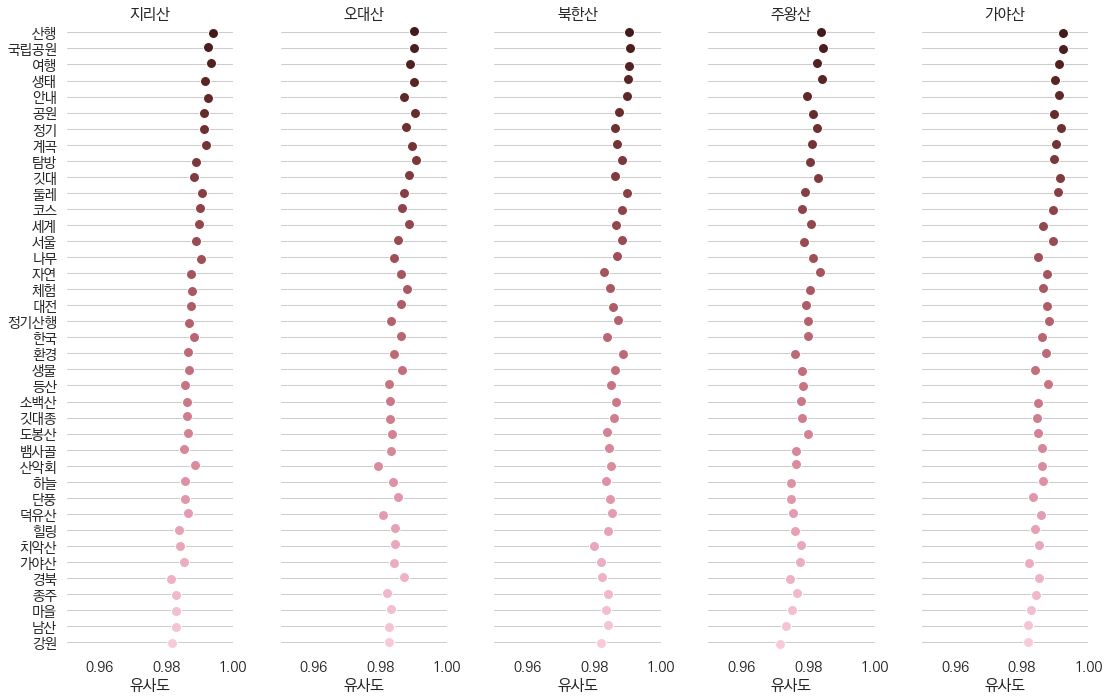

In [14]:
# 플롯 설정
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.3)
g = sns.PairGrid(df.sort_values("전체", ascending=False), x_vars=df.columns[1:6], y_vars=["단어"])
g.fig.set_size_inches(16,16)

# 스트립플롯 함수를 이용한 닷 플롯
g.map(sns.stripplot,
      size=10,
      orient="h",
      palette="ch:s=1,r=-.1,h=1_r",
      linewidth=1,
      edgecolor="w")
g.set(xlim=(0.95, 1), xlabel="유사도", ylabel="")
titles = ["지리산", "오대산", "북한산", "주왕산", "가야산"]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)                        # 축 제목 설정
    ax.xaxis.grid(False); ax.yaxis.grid(True) # 수평 격자 설정

sns.despine(left=True, bottom=True)
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')